# setup

Run this once before the plot’s code. The individual charts, however, may redefine its own aesthetics.

In [1]:
#install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings;warnings.filterwarnings('ignore')

In [2]:
large = 22; med = 16; small = 12
params = {'axes.titlesize':large,
          'legend.fontsize':med,
          'figure.figsize':(16,10),
          'axes.labelsize':med,
          'axes.titlesize':med,
          'xtick.labelsize':med,
          'ytick.labelsize':med,
          'figure.titlesize':large}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style('white')
%matplotlib inline

# Version
print(mpl.__version__)
print(sns.__version__) 

3.4.2
0.11.1


## Corralation

The plots under correlation is used to visualize the relationship between 2 or more variables. That is, how does one variable change with respect to another.

### Scatter Plot

Scatteplot is a classic and fundamental plot used to study the relationship between two variables. If you have multiple groups in your data you may want to visualise each group in a different color. In `matplotlib`, you can conveniently do this using `plt.scatterplot()`

In [3]:
#Import dataset
midwest = pd.read_csv('../data/midwest_filter.csv')
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


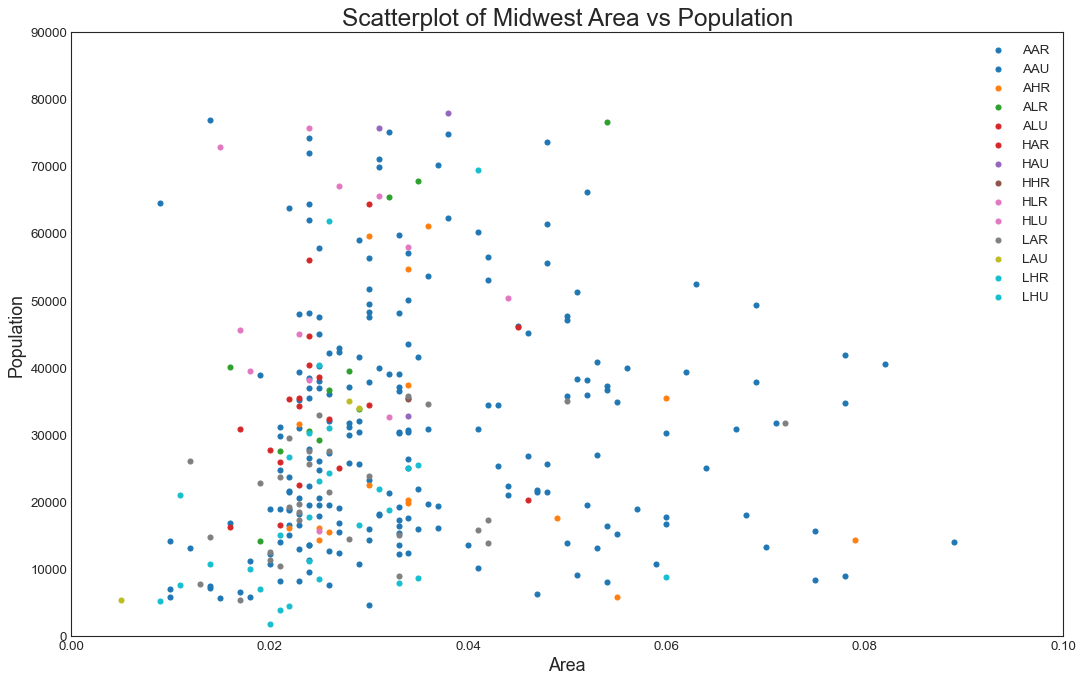

In [4]:


#Prepare Data
#Create as many as there are unique midwest['Category']

categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

#Draw Plot for Each Category
plt.figure(figsize = (16,10),dpi = 80,facecolor='w',edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area','poptotal',
               data=midwest.loc[midwest.category==category,:],
               s=20,c=np.array(colors[i]).reshape(1,-1),label=str(category))

#Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')
plt.xticks(fontsize=12);plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)
plt.show()

Notes: `colors[i] warning,use c=np.array(colors[i]).reshape(1,-1)`

### Bubble plot with Encircling

Sometimes you want to show a group of points within a boundary to emphasize their importance. In this example, you get the records from the dataframe that should be encircled and pass it to the `encircle()` described in the code below.

For the `def encircle(x,y,an=None,**kw):`,check the question:[How do I encircle different data sets in scatter plot?](https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot)

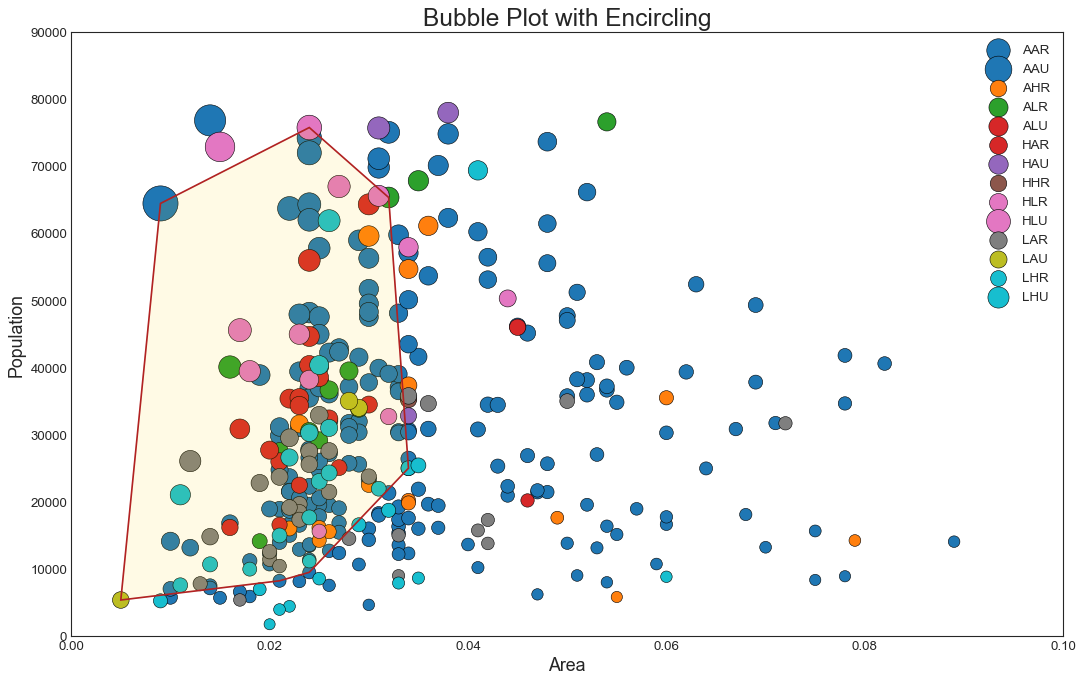

In [5]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

# Step 1: Prepare Data
midwest = pd.read_csv('../data/midwest_filter.csv')

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s='dot_size', c=np.array(colors[i]).reshape(1,-1), 
                
       ##colors[i] warning,use c=np.array(colors[i]).reshape(1,-1)
                
                label=str(category), edgecolors='black', linewidths=.5)

    
# Step 3: Encircling 

## https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

### Scatter plot with linear regression line of best fit

If you want to understand how two variables change with respect to each other, the line of best fit is the way to go.

The below plot shows how the line of best fit differs amongst various groups in the data. 

To disable the groupings and to just draw one line-of-best-fit for the entire dataset, remove the `hue='cyl'` parameter from the `sns.lmplot()` call below.


In [6]:
#Import Data
df = pd.read_csv('../data/mpg.csv')
df.head(-10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
219,volkswagen,jetta,2.8,1999,6,auto(l4),f,16,23,r,compact
220,volkswagen,jetta,2.8,1999,6,manual(m5),f,17,24,r,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [7]:
df_select = df.loc[df.cyl.isin([4,8]), :]
df_select.head(-10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
209,volkswagen,gti,2.0,2008,4,manual(m6),f,21,29,p,compact
210,volkswagen,gti,2.0,2008,4,auto(s6),f,22,29,p,compact
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
213,volkswagen,jetta,2.0,1999,4,manual(m5),f,21,29,r,compact


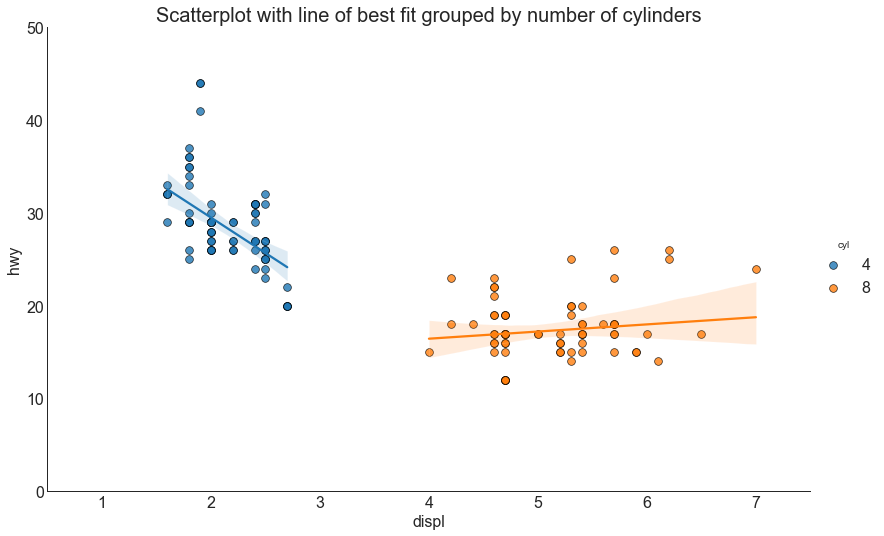

In [8]:
#Plot
sns.set_style("white")
grid_obj= sns.lmplot(x="displ",y="hwy",hue="cyl",data=df_select,
                   height=7,aspect=1.6,robust=True,palette='tab10',
                   scatter_kws=dict(s=60,linewidths=0.7,edgecolors='black'))

#Decorations
grid_obj.set(xlim=(0.5,7.5),ylim=(0.,50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders",fontsize=20)
plt.show()

#### Each regression line in its own column

Alternately, you can show the best fit line for each group in its own column. 

You can do this by setting the `col=groupingcolumn` parameter inside the `sns.lmplot()`.

In [9]:
#Import Data (mpg_ggplot2)
# df = pd.read_csv('../data/mpg.csv')
# df.head(-10)
# df_select = df.loc[df.cyl.isin([4,8]), :]
df_select.head(-10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
209,volkswagen,gti,2.0,2008,4,manual(m6),f,21,29,p,compact
210,volkswagen,gti,2.0,2008,4,auto(s6),f,22,29,p,compact
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
213,volkswagen,jetta,2.0,1999,4,manual(m5),f,21,29,r,compact


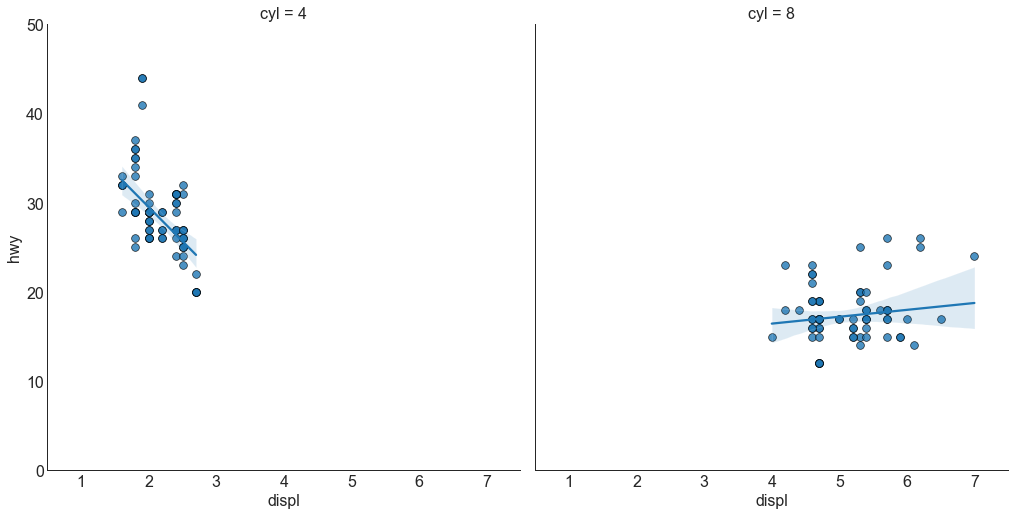

In [18]:
# Each line in its own column
sns.set_style("white")

grid_obj = sns.lmplot(x="displ",y="hwy",
                      data=df_select,
                      height=7,
                      robust=True,
                      palette='Set1',
                      col='cyl',
                      scatter_kws=dict(s=60,linewidths=0.7,edgecolors='black'))
# Decorations             
grid_obj.set(xlim=(0.5,7.5),ylim=(0,50))
plt.show()

### Jittering with stripplot

Often multiple datapoints have exactly the same X and Y values. 

As a result, multiple points get plotted over each other and hide. 

To avoid this, **jitter the points** slightly so you can visually see them. 

This is convenient to do using `seaborn’s stripplot()`.

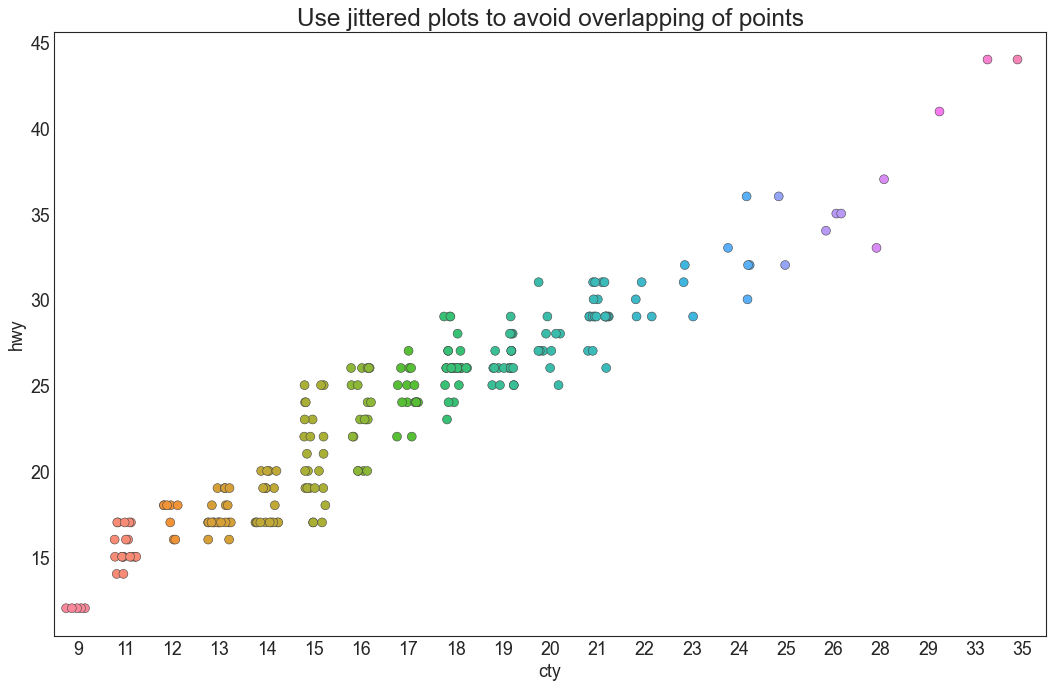

In [19]:
#Import data
# df.head()

#Draw Stripplot
_, ax = plt.subplots(figsize=(16,10),dpi=80)
sns.stripplot(df.cty,df.hwy,
              jitter=0.25,size=8,
             ax=ax,linewidth=0.5)

#Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

### Count Plot

Another option to avoid the problem of points overlap is:

    the increase the size of the dot depending on how many points lie in that spot. 
    
 
So, larger the size of the point more is the concentration of points around that.

In [45]:
#Import data mpg
# df.head()
# Prepare the data, filter the data we want:'hwy','cty'
df_counts = df.groupby(['hwy','cty']).size().reset_index(name='counts')
df_counts.head()

,hwy,cty,counts
0,12,9,5
1,14,11,2
2,15,11,10
3,16,11,3
4,16,12,2


In [46]:
# df_counts.cty

In [47]:
# df_counts.hwy

In [48]:
# df_counts.counts

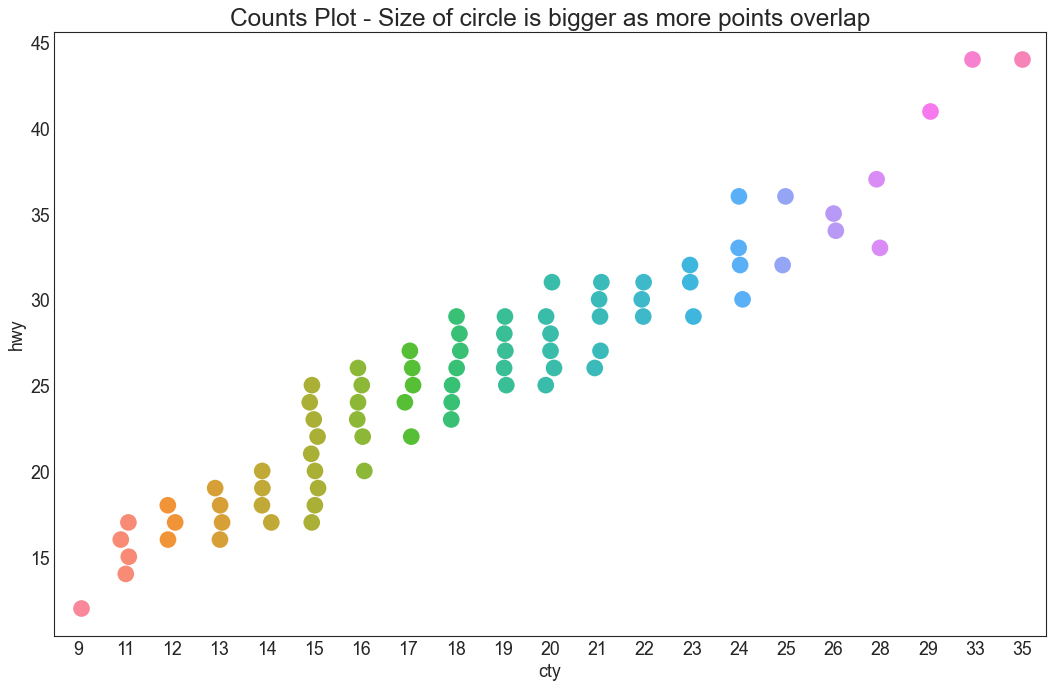

In [49]:
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_counts.cty, df_counts.hwy,
              size=df_counts.counts*2,
              ax=ax, s=15)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

##### ?help: where is the bigger and smaller circles?

this is the orignal plot:


<img src=https://www.machinelearningplus.com/wp-content/uploads/2018/11/5_Counts_plot_Matplotlib-min.png>

$\mathit{So\ what\ should\ I\ do,\ Ellie?~~~~~~~~~~~~(Up,2009)}$

In [ ]:
# # Import Data
# df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
# df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# # Draw Stripplot
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
# sns.stripplot(df_counts.cty, df_counts.hwy, size=df_counts.counts*2, ax=ax)

# # Decorations
# plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
# plt.show()

### Marginal Histogram

Marginal histograms have a histogram along the X and Y axis variables. 

This is used to visualize the relationship between the X and Y along with the univariate distribution of the X and the Y individually. 

This plot if often used in `exploratory data analysis (EDA)`.


NameError: name 'price' is not defined

In [52]:
# Import Data
# df.head()

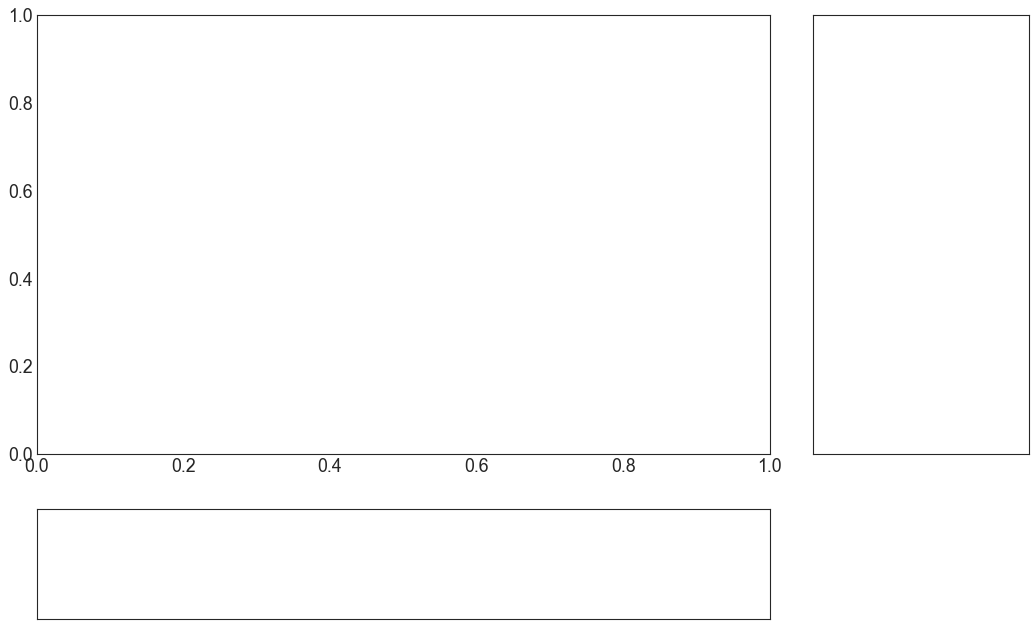

In [59]:
# Create Fig and Gridspec
fig = plt.figure(figsize=(16,10),dpi=80)
grid = plt.GridSpec(4,4,hspace=0.5,wspace=0.2)

#Define the axes
ax_main = fig.add_subplot(grid[:-1,:-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*4, 
                c=df.manufacturer.astype('category').cat.codes, 
                alpha=.9, data=df, cmap="tab10", edgecolors='gray',
                linewidths=.5)

# histogram on the right
ax_bottom.hist(df.displ, 40, histtype='stepfilled', 
               orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()




AttributeError: 'GridSpec' object has no attribute 'summary'